In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

popsong_df = pd.read_csv("Data\song_views.csv")
popsong_df.head()

,user_id,song_id,title,listen_count
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0


In [13]:
watched = np.array(popsong_df['listen_count'])
# Set watched_manual = 1 for watched_manual >= 1
#                    = 0 otherwise
watched_manual[watched >= 1] = 1
popsong_df['watched_manual'] = watched_manual
popsong_df.head()

,user_id,song_id,title,listen_count,watched_manual
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0


In [14]:
from sklearn.preprocessing import Binarizer

# Set listen_count = 1 for listen_count >  0.9 and 
#                  = 0 otherwise
bn = Binarizer(threshold=0.9)
watched_bin = bn.transform([popsong_df['listen_count']])[0]
popsong_df['watched_bin'] = watched_bin
popsong_df.head()

,user_id,song_id,title,listen_count,watched_manual,watched_bin
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0,0


In [15]:
popularity_df = pd.read_csv('Data/item_popularity.csv')
popularity_df

,item_id,pop_percent
0,it_01345,0.98324
1,it_03431,0.56123
2,it_04572,0.12098
3,it_98021,0.35476
4,it_01298,0.92101
5,it_90120,0.81212
6,it_10123,0.56502


In [16]:
popularity_df['pop_on_scale_10'] = np.array(np.round(popularity_df['pop_percent']*10), dtype='int')
popularity_df['pop_on_scale_100'] = np.array(np.round(popularity_df['pop_percent']*100), dtype='int')
popularity_df

,item_id,pop_percent,pop_on_scale_10,pop_on_scale_100
0,it_01345,0.98324,10,98
1,it_03431,0.56123,6,56
2,it_04572,0.12098,1,12
3,it_98021,0.35476,4,35
4,it_01298,0.92101,9,92
5,it_90120,0.81212,8,81
6,it_10123,0.56502,6,57


In [17]:
fcc_survey_df = pd.read_csv('Data/2016-FCC-New-Coders-Survey-Data.csv')
fcc_survey_df[['ID.x', 'EmploymentField', 'Age', 'Income']].head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (21,57) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


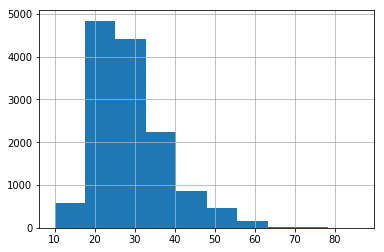

In [18]:
fig, ax = plt.subplots()
fcc_survey_df['Age'].hist()

### Log Transformation 
Converts Skewed distribution to Normal distribution

In [31]:
# I guess, we are adding 1 to avoid log 0 which is undefined and 
#   adding 1 when compared to huge values of Income, doesn't skew the results much
#   min income = 6000, max income = 200000
fcc_survey_df['Income_log'] = np.log((1+fcc_survey_df['Income']))
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log']].head()

# Compute mean of Income_log
income_log_mean = np.round(np.mean(fcc_survey_df['Income_log']), 2)
print ("Mean Income Log = ", income_log_mean)

Mean Income Log =  10.43


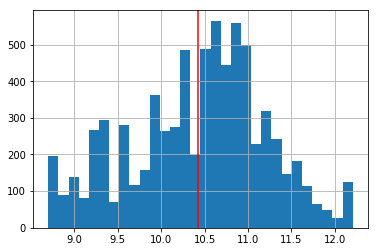

In [32]:
# Draw histogram of Income_Log with mean in red color
fig, ax = plt.subplots()
fcc_survey_df['Income_log'].hist(bins=30)
plt.axvline(income_log_mean, color='r')

### Box-Cox Transformation
Converts Skewed distibution to Normal distribution

In [63]:
import scipy.stats as spstats

# Get income into an array to clean null values
income = np.array(fcc_survey_df['Income'])
income_clean = income[~np.isnan(income)]

l, opt_lmbda = spstats.boxcox(income_clean)
print('Optimal lambda = ', opt_lmbda)

Optimal lambda =  0.1179912266208748


In [68]:
fcc_survey_df['Income_boxcox_lambda_0'] = spstats.boxcox((1+fcc_survey_df['Income']), lmbda = 0)
fcc_survey_df['Income_boxcox_lambda_opt'] = spstats.boxcox((fcc_survey_df['Income']), lmbda = opt_lambda)
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log', 'Income_boxcox_lambda_0', 'Income_boxcox_lambda_opt']].head()

# Compute the mean
income_boxcox_mean = np.round(np.mean(fcc_survey_df['Income_boxcox_lambda_opt']), 2)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1029: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


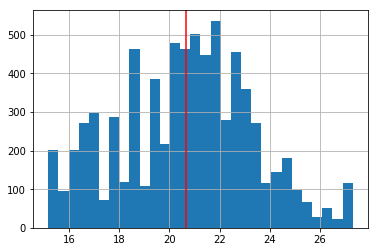

In [69]:
fig, ax = plt.subplots()
fcc_survey_df['Income_boxcox_lambda_opt'].hist(bins=30)
plt.axvline(income_boxcox_mean, color='r')